<a href="https://colab.research.google.com/github/manor-s/DS-course-project-4/blob/main/Classification_project_Olga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
import xgboost as xgb
from imblearn.over_sampling import SMOT

ImportError: cannot import name 'SMOT' from 'imblearn.over_sampling' (/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/__init__.py)

# Load data and explore (EDA)


In [1]:
DATA_PATH='/content/drive/MyDrive/Churn_Modelling.csv'

In [16]:
# data_file = pd.read_csv(DATA_PATH,index_col='RowNumber')
data_file = pd.read_csv(DATA_PATH)

In [5]:
data_file.shape

(10000, 14)

In [17]:
data_file.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
data_file.CustomerId.nunique(),data_file.RowNumber.nunique(),data_file.Surname.nunique()


(10000, 10000, 2932)

In [20]:
data_file_no_duplicates = data_file.drop_duplicates()
data_file_no_duplicates.shape

(10000, 14)

In [21]:
data_file.drop
data_file.drop(columns=["RowNumber"], inplace=True)

In [22]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [23]:
data_file.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Observe distribution of label

In [24]:
pd.value_counts(data_file['Exited'], normalize=True)

<ipython-input-24-06da3fcf5229>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data_file['Exited'], normalize=True)


,proportion
Exited,
0,0.7963
1,0.2037


In [25]:
# pd.set_option('display.max_columns', None)
# print(list(data_file.columns))
print(data_file.columns)

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')


# Numerical variables

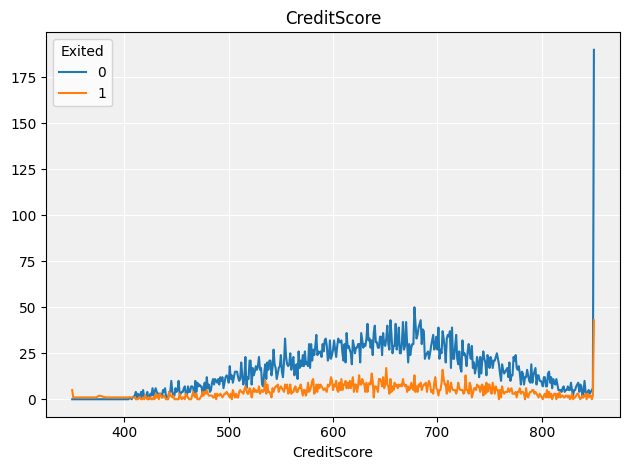

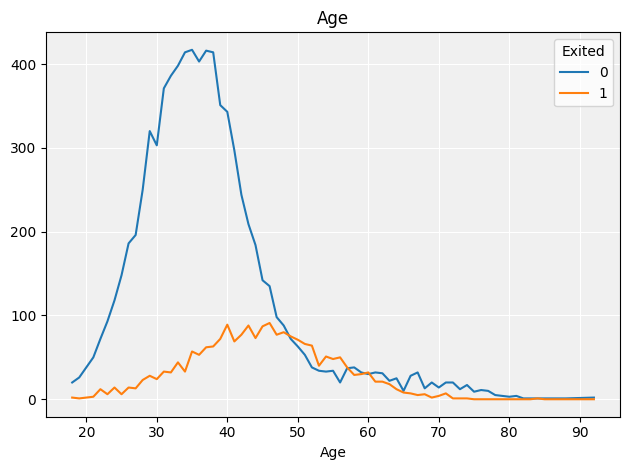

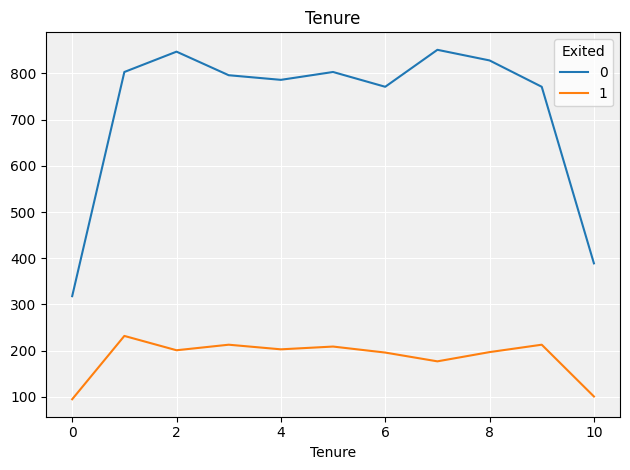

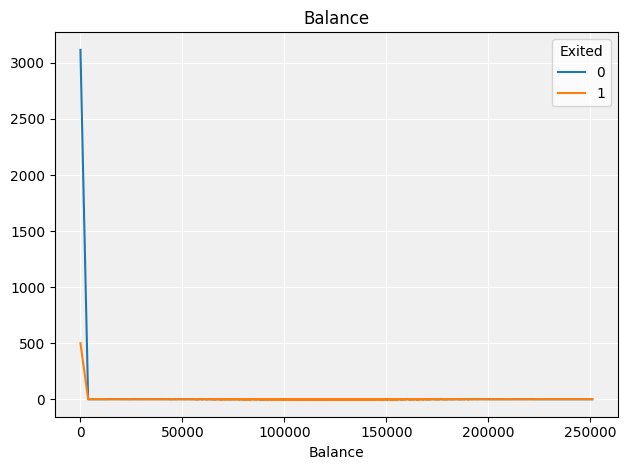

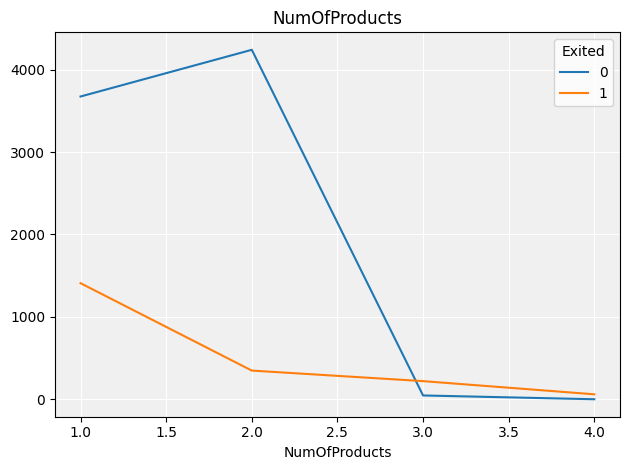

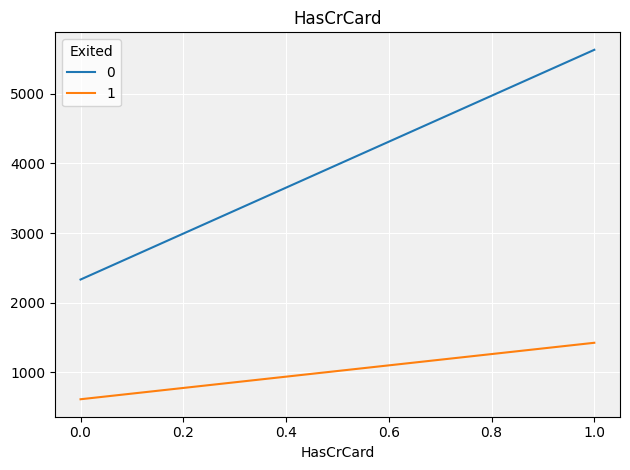

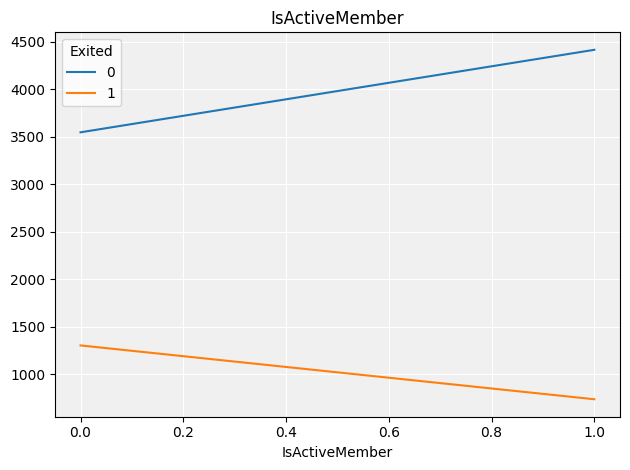

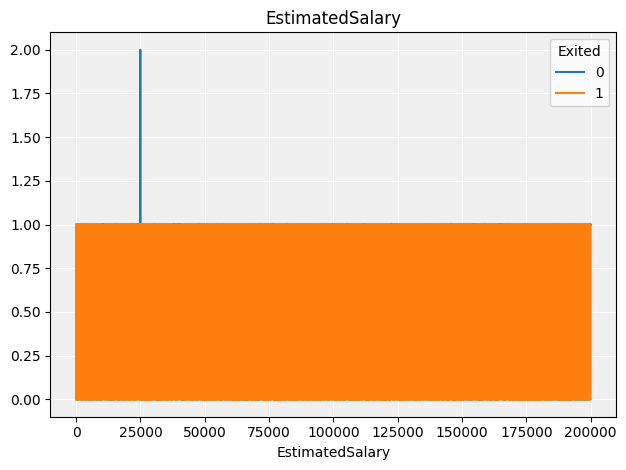

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Example for your numerical variables and dataset
numerical_variables = [col for col in data_file.select_dtypes(exclude='object').columns if col not in ['CustomerId', 'Exited']]

for col in numerical_variables:
    # Create the plot for crosstab
    ax = pd.crosstab(data_file[col], data_file['Exited']).plot()

    # Set grey background for the plot area
    # ax.set_facecolor('lightgrey')
    ax.set_facecolor('#f0f0f0')

    # Customize grid lines for better visualization
    ax.grid(True, color='white', linestyle='-', linewidth=0.75)

    # Add title and layout adjustments
    plt.title(col)
    plt.tight_layout()
    plt.show()

<ipython-input-42-ad6dea63768a>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


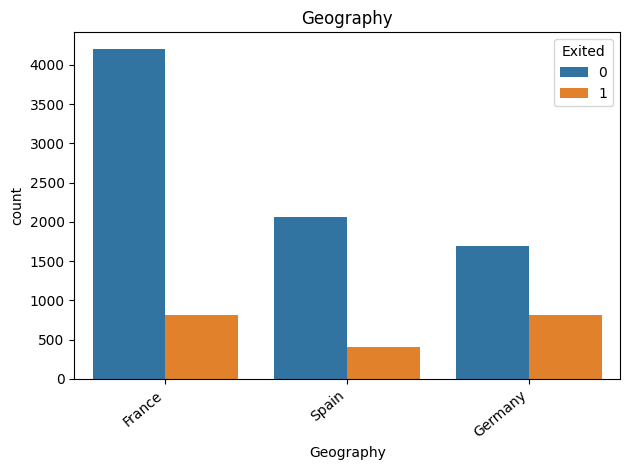

<ipython-input-42-ad6dea63768a>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


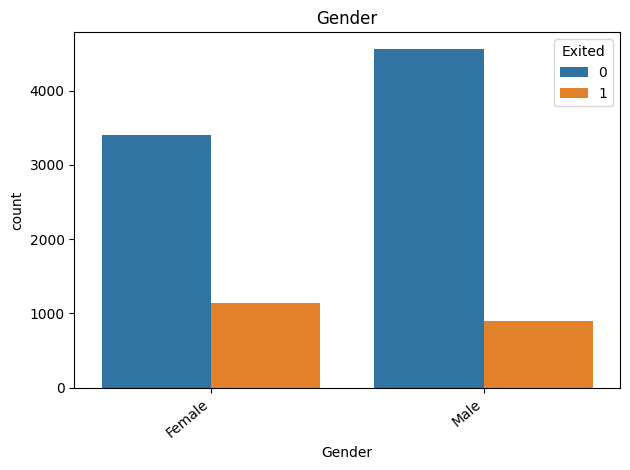

In [42]:
categorical_variables = [col for col in data_file.select_dtypes(include='object').columns if col not in ['CustomerId', 'Surname','Exited']]

for col in categorical_variables:
    plt.figure()
    ax = sns.countplot(x=col, data=data_file, hue='Exited')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.title(col)
    plt.tight_layout()

    plt.show()

# Checking Outliers

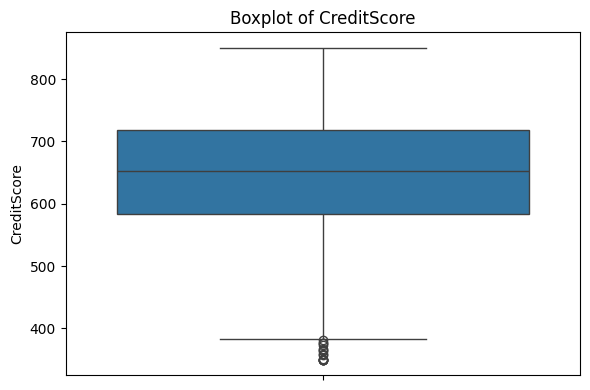

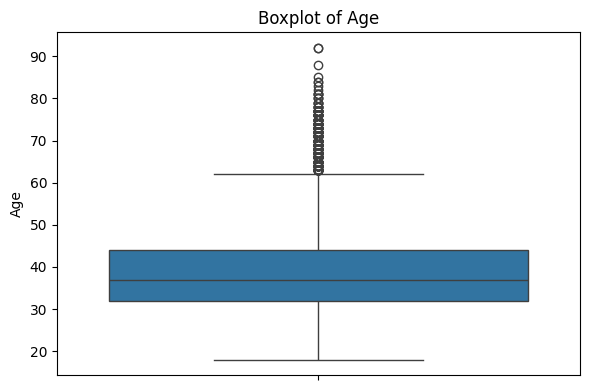

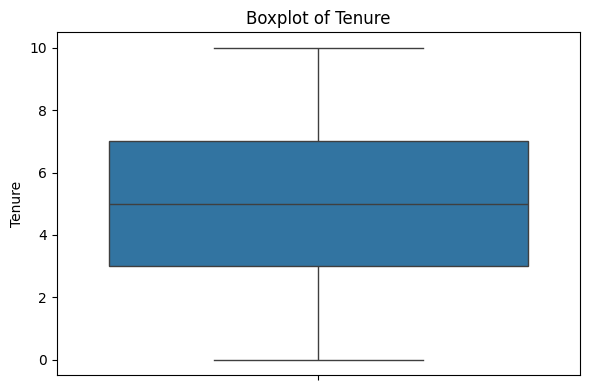

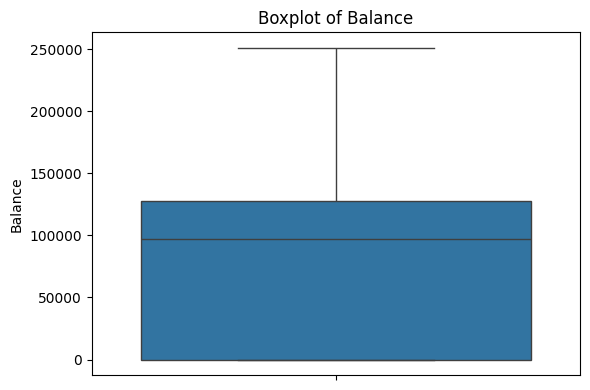

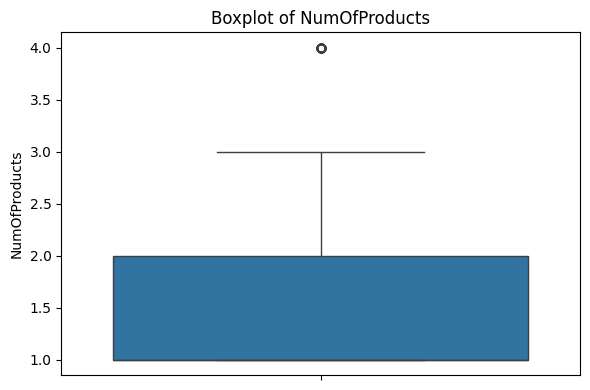

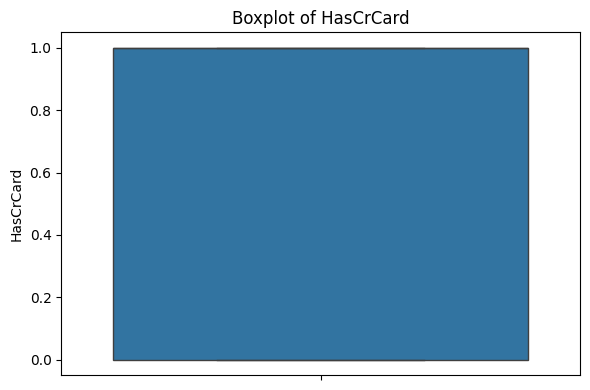

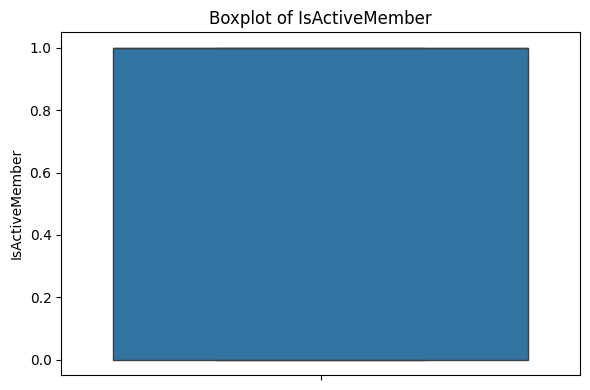

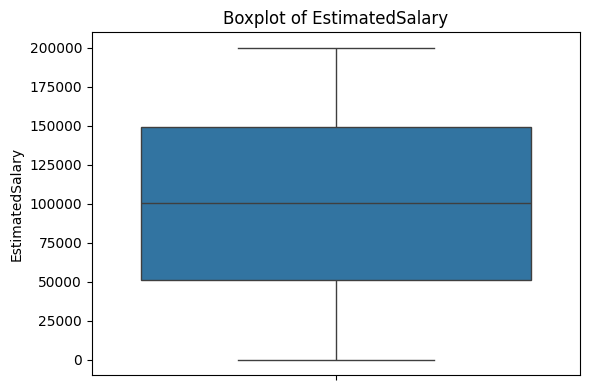

In [57]:
for col in numerical_variables:
    plt.figure(figsize=(6, 4))

 # Create boxplot with seaborn, optionally group by 'Exited'
    sns.boxplot(y=data_file[col], data=data_file)

    # Add title and labels
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

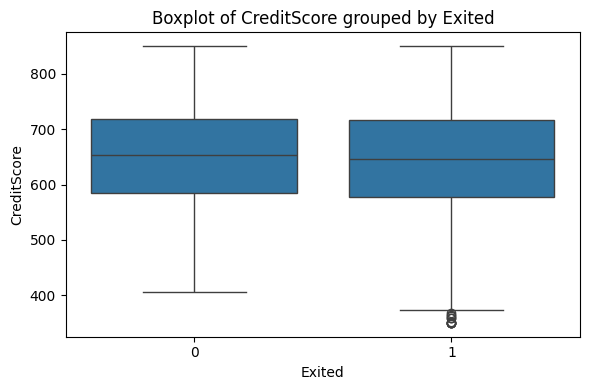

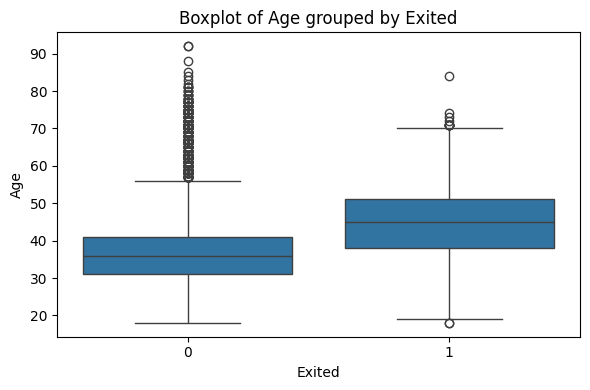

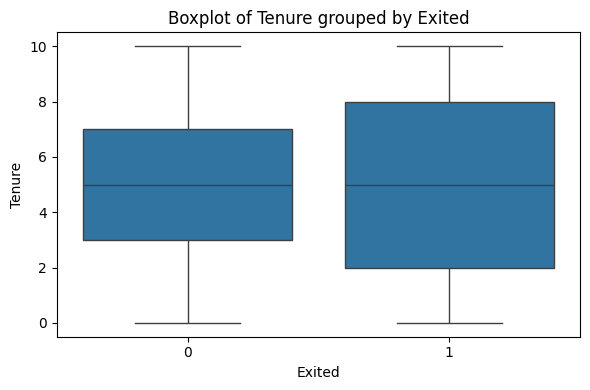

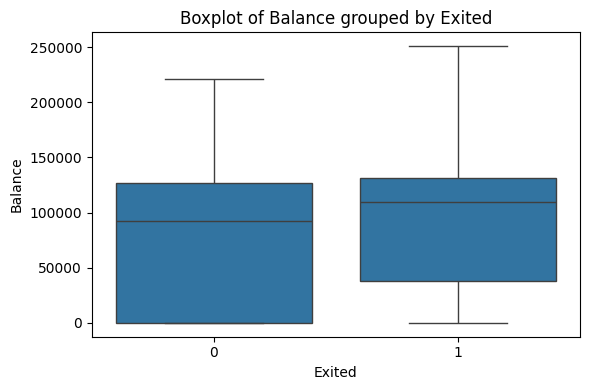

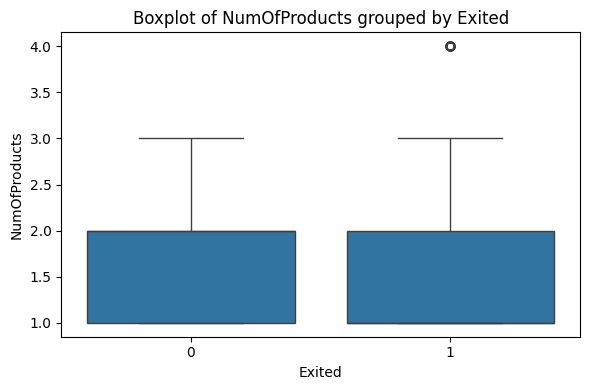

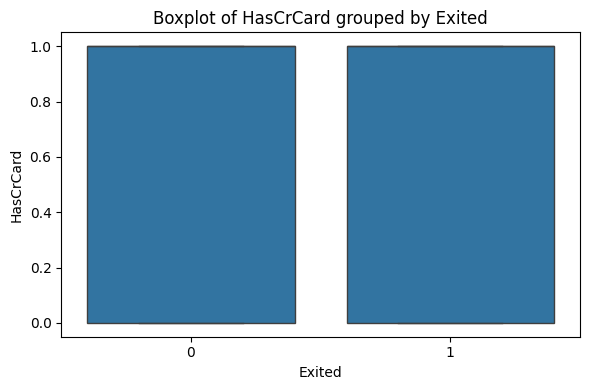

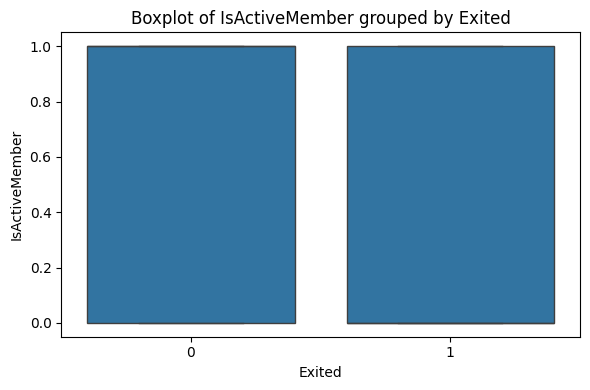

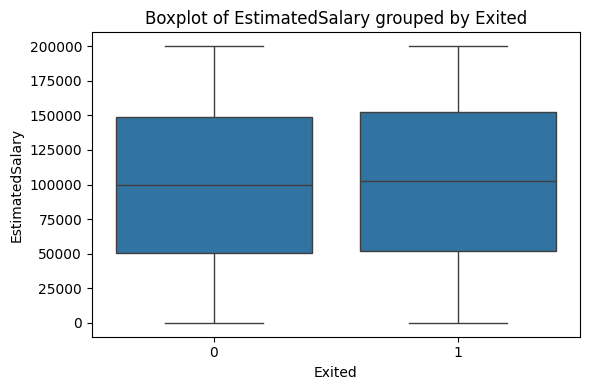

In [55]:
for col in numerical_variables:
    plt.figure(figsize=(6, 4))

    # Create boxplot with seaborn, optionally group by 'Exited'
    sns.boxplot(x=data_file['Exited'], y=data_file[col], data=data_file)

    # Add title and labels
    plt.title(f'Boxplot of {col} grouped by Exited')
    plt.xlabel('Exited')
    plt.ylabel(col)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Observe correlations

Scatter Matrix:
- Helps to identify the relationships between pairs of features.
- Useful for detecting linear and non-linear relationships, clusters, and outliers.
-Provides a comprehensive view of how features interact with each other.


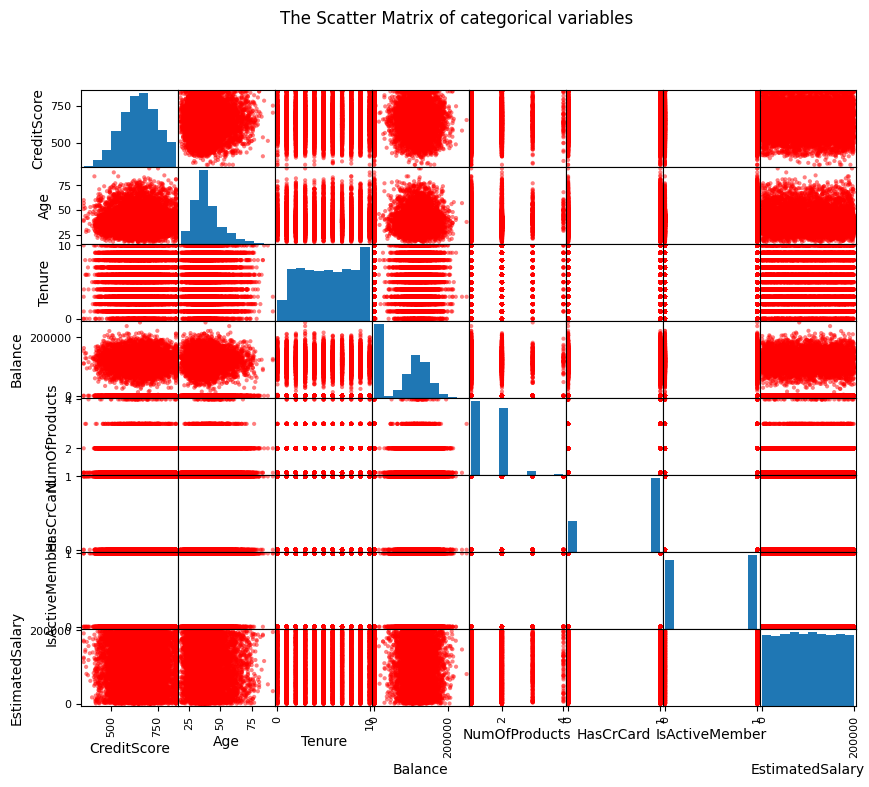

In [43]:
sc_matrix = scatter_matrix(data_file[numerical_variables], figsize=(10,8), color="red")
plt.suptitle('The Scatter Matrix of categorical variables')
plt.show()

Correlation Matrix/Heatmap
- Identify relationships between variables/Pearson correlation coefficients for linear relationship
- Spot clusters of highly correlated variables.
- Identify redundant features that can be removed or combined.

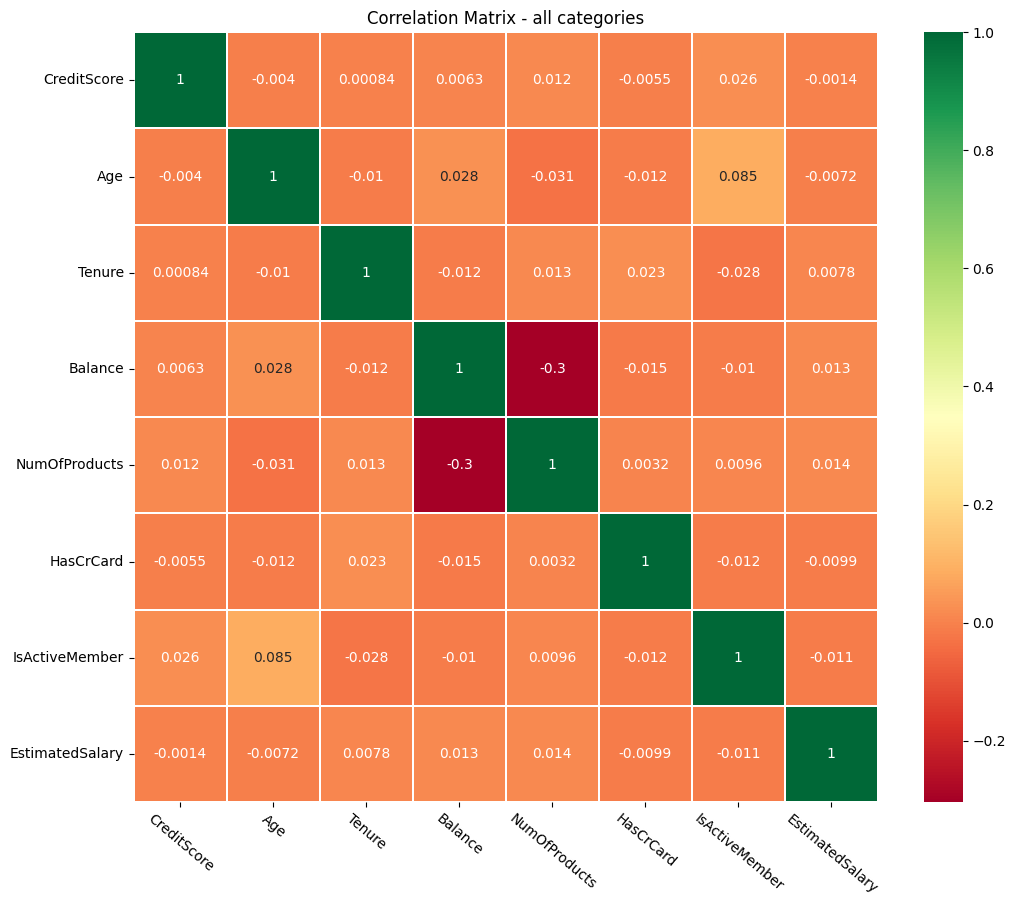

In [44]:
corr_matrix = data_file[numerical_variables].corr()

cor_plot = sns.heatmap(corr_matrix,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.xticks(fontsize=10, rotation=-40)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix - all categories')
plt.show()

### Look for missing values


In [45]:
data_file[numerical_variables].isnull().sum()

,0
CreditScore,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [47]:
data_file.drop(columns=['Surname'], inplace=True)

### Get dummies

In [48]:
dummies = pd.get_dummies(data_file, columns=categorical_variables)
dummies.head(5)

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


In [50]:
dummies[dummies.select_dtypes(['bool']).columns] = dummies.select_dtypes(['bool']).astype(int)
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerId         10000 non-null  int64  
 1   CreditScore        10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_France   10000 non-null  int64  
 11  Geography_Germany  10000 non-null  int64  
 12  Geography_Spain    10000 non-null  int64  
 13  Gender_Female      10000 non-null  int64  
 14  Gender_Male        10000 non-null  int64  
dtypes: float64(2), int64(13)
memory usage: 1.1 MB


#### Scale the numerical columns

In [52]:
scaler = MinMaxScaler()
# This way executed as an experiment that did not leave to better results
# numerical_variables = [col for col in numerical_variables if col!='pdays']
dummies[numerical_variables] = scaler.fit_transform(dummies[numerical_variables])
dummies.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,15634602,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1,1,0,0,1,0
1,15647311,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0,0,0,1,1,0
2,15619304,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1,1,0,0,1,0
3,15701354,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0,1,0,0,1,0
4,15737888,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0,0,0,1,1,0


### Split the training set into train/test/validation

In [58]:
y = data_file['Exited']
X = dummies[[col for col in dummies.columns if col!='CustomerId' and col!='Exited']]
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1,0,0,1,0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0,0,1,1,0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1,0,0,1,0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,1,0,0,1,0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0,0,1,1,0


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

print(
    f"The distribution of labels in train data is: \n {pd.value_counts(y_train)}\nPercentage distribution: \n {pd.value_counts(y_train, normalize=True)}")
print(
    f"The distribution of labels in test data is: \n {pd.value_counts(y_test)}\nPercentage distribution: \n {pd.value_counts(y_test, normalize=True)}")
print(
    f"The distribution of labels in validation data is: \n {pd.value_counts(y_val)}\nPercentage distribution: \n {pd.value_counts(y_val, normalize=True)}")

The distribution of labels in train data is: 
 Exited
0    4769
1    1231
Name: count, dtype: int64
Percentage distribution: 
 Exited
0    0.794833
1    0.205167
Name: proportion, dtype: float64
The distribution of labels in test data is: 
 Exited
0    1607
1     393
Name: count, dtype: int64
Percentage distribution: 
 Exited
0    0.8035
1    0.1965
Name: proportion, dtype: float64
The distribution of labels in validation data is: 
 Exited
0    1587
1     413
Name: count, dtype: int64
Percentage distribution: 
 Exited
0    0.7935
1    0.2065
Name: proportion, dtype: float64


<ipython-input-59-6fc8cd83b9f1>:5: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  f"The distribution of labels in train data is: \n {pd.value_counts(y_train)}\nPercentage distribution: \n {pd.value_counts(y_train, normalize=True)}")
<ipython-input-59-6fc8cd83b9f1>:7: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  f"The distribution of labels in test data is: \n {pd.value_counts(y_test)}\nPercentage distribution: \n {pd.value_counts(y_test, normalize=True)}")
<ipython-input-59-6fc8cd83b9f1>:9: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  f"The distribution of labels in validation data is: \n {pd.value_counts(y_val)}\nPercentage distribution: \n {pd.value_counts(y_val, normalize=True)}")
